## Pandas 
#### An open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
- [Pandas documentation](http://pandas.pydata.org/pandas-docs/dev)
- [Pandas code repository](https://github.com/pydata/pandas)
- [Pandas code example: Stock price analysis](https://github.com/pydata/pandas/blob/master/examples/finance.py)
- [Pandas code example: Stock price regression](https://github.com/pydata/pandas/blob/master/examples/regressions.py)
- [Clean data with Google Refine](http://code.google.com/p/google-refine/)

In [2]:
import pandas as pd
# html output of table
from IPython.display import HTML

dataset = 'Pandas'
pd.set_printoptions(max_rows=10)

In [3]:
users = pd.read_csv('data/' + dataset + 'Users.csv')
posts = pd.read_csv('data/' + dataset + 'Posts.csv')
answers = pd.read_csv('data/' + dataset + 'Answers.csv')
answerers = pd.read_csv('data/' + dataset + 'Answerers.csv')

all_users = users.append(answerers,ignore_index=True)

In [4]:
uposts = pd.merge(posts, all_users, left_on = 'OwnerUserId', right_on='Id', suffixes=['_post', '_user'])
uposts

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1321 entries, 0 to 1320
Data columns (total 31 columns):
Id_post              1321  non-null values
PostTypeId           1321  non-null values
AcceptedAnswerId     915  non-null values
CreationDate_post    1321  non-null values
Score                1321  non-null values
ViewCount            1321  non-null values
Body                 1321  non-null values
OwnerUserId          1321  non-null values
OwnerDisplayName     1  non-null values
LastEditorUserId     607  non-null values
LastEditDate         607  non-null values
LastActivityDate     1321  non-null values
Title                1321  non-null values
Tags                 1321  non-null values
AnswerCount          1259  non-null values
CommentCount         611  non-null values
FavoriteCount        416  non-null values
ClosedDate           29  non-null values
Id_user              1321  non-null values
Reputation           1321  non-null values
CreationDate_user    1321  non-null values
DisplayName          1321  non-null values
LastAccessDate       1321  non-null values
WebsiteUrl           256  non-null values
Location             409  non-null values
AboutMe              337  non-null values
Views                1321  non-null values
UpVotes              1321  non-null values
DownVotes            1321  non-null values
EmailHash            1321  non-null values
Age                  256  non-null values
dtypes: float64(6), int64(10), object(15)

In [5]:
# string, not computationally useful
uposts.CreationDate_post[0]

'2012-11-19 02:12:10'

In [7]:
# convert timestamp to datetime object
tstamp = pd.to_datetime(uposts.CreationDate_post)[1]
tstamp

<Timestamp: 2012-11-20 17:22:04>

In [8]:
tstamp.weekday()

1

In [9]:
stamps = pd.to_datetime(uposts.CreationDate_post)
post_views = uposts.ViewCount
post_views.index = stamps
post_views

CreationDate_post
2012-11-19 02:12:10     74
2012-11-20 17:22:04    107
2012-12-30 17:19:57     65
...
2012-11-14 22:14:50     40
2012-11-17 19:34:36     74
2012-11-18 22:22:39    154
Name: ViewCount, Length: 1321, dtype: int64

In [10]:
post_views.groupby(post_views.index.year).agg(['count','sum','mean','min','max'])

count     sum         mean  min   max
2011     19   37037  1949.315789  368  6454
2012   1073  293750   273.765144   27  3238
2013    229   13730    59.956332    5   518

In [15]:
keys = [post_views.index.year, post_views.index.month ]


In [16]:
# pivot table
pview = post_views.groupby(keys).agg(['count','sum','mean'])
HTML(pview.to_html()) 

In [27]:
HTML(pview.unstack(0).to_html()) 

In [28]:
HTML(pview.unstack(0).to_html()) 

In [29]:
HTML(pview.unstack(0).fillna(0).to_html()) 

In [30]:
HTML(pview.unstack(0)['sum'].to_html()) 

In [31]:
pview.unstack(0)['sum', 2012]

# 27310.0
# pview.unstack(0)['sum', 2012][3]

1     4901
2     3137
3    27310
...
10    23630
11    18153
12    14383
Name: (sum, 2012), Length: 12, dtype: float64

In [32]:
pd.options.display.max_columns = 25
HTML(pview.unstack(0).stack().to_html()) 

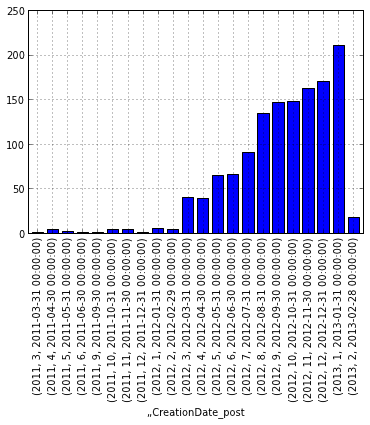

In [43]:
pview = post_views.groupby(keys) 
# plot reference http://pandas.pydata.org/pandas-docs/dev/visualization.html
pview.resample('M',how='count').plot(kind='bar')
                                    

In [44]:
# frequency conversion and resampling of regular time-series data.
pview.resample('M',how='sum')

         CreationDate_post
2011  3  2011-03-31            1128
      4  2011-04-30            7828
      5  2011-05-31           12908
...
2012  12  2012-12-31           14383
2013  1   2013-01-31           13112
      2   2013-02-28             618
Length: 22, dtype: int64

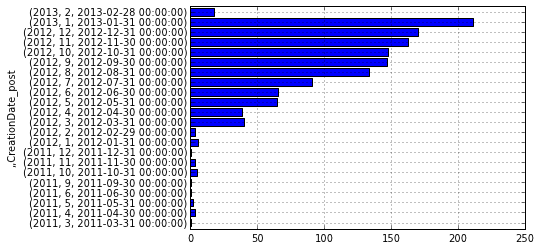

In [45]:
# http://pandas.pydata.org/pandas-docs/dev/timeseries.html
pview.resample('M',how='count').plot(kind='barh')

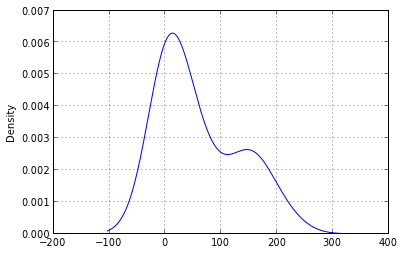

In [46]:
pview.resample('M',how='count').plot(kind='kde')